<a href="https://colab.research.google.com/github/SiMori92/MarketOpen30-DL/blob/main/Step1_Inspection_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Content

1. check on consol data
  - SOXL
  - TQQQ
  - UVXY
  - VXX


##1. check on consol data

In [ ]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import os

## SOXL inspection

Data loaded successfully!

=== Basic Data Inspection ===

1. DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151 entries, 0 to 2150
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   2151 non-null   object 
 1   Date                                 2151 non-null   object 
 2   Ticker                               2151 non-null   object 
 3   T-1 Close Price                      2100 non-null   float64
 4   T-1 High Price                       2100 non-null   float64
 5   T-1 Low Price                        2100 non-null   float64
 6   T-1 Volume                           2100 non-null   float64
 7   T-1 Adjusted Close Price             2100 non-null   float64
 8   T-1 Adjusted Volume                  2100 non-null   float64
 9   Pre-market/ Futures Open Price       2072 non-null   float64
 10  Pre-market/ Futures

<Figure size 1200x600 with 0 Axes>

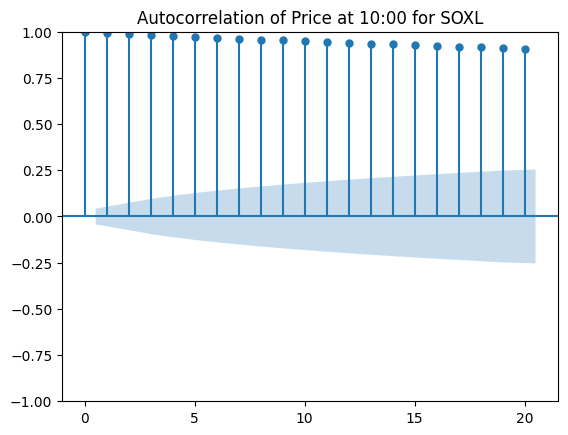

Autocorrelation plot displayed.

4. Outlier Detection (Price at 10:00):
Number of outliers in Price at 10:00: 41

5. Class Imbalance Check (Price Movement):
Direction
Up     0.51
Down   0.49
Name: proportion, dtype: float64

6. Data Leakage Check:
Ensure features used for predicting 'Price at 10:00' do not include later prices.
Time-ordered price columns: ['T-1 Close Price', 'Pre-market/ Futures Open Price', 'Price at market open', 'Price at 9:31', 'Price at 9:35', 'Price at 9:40', 'Price at 9:45', 'Price at 9:50', 'Price at 9:55', 'Price at 10:00']

7. Feature Correlation with Target (Price at 10:00):
Price at 10:00                        1.00
Low Price 0956-1000                   1.00
High Price 0956-1000                  1.00
Price at 9:55                         1.00
Low Price 0951-0955                   1.00
High Price 0951-0955                  1.00
Price at 9:50                         1.00
Low Price 0946-0950                   1.00
High Price 0946-0950                  1.00
Pri

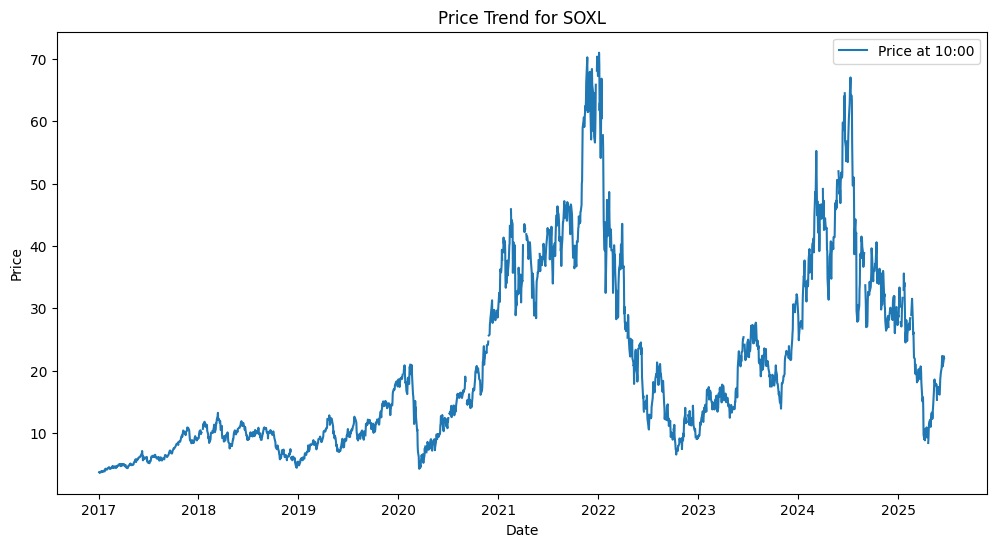

Price trend plot displayed.


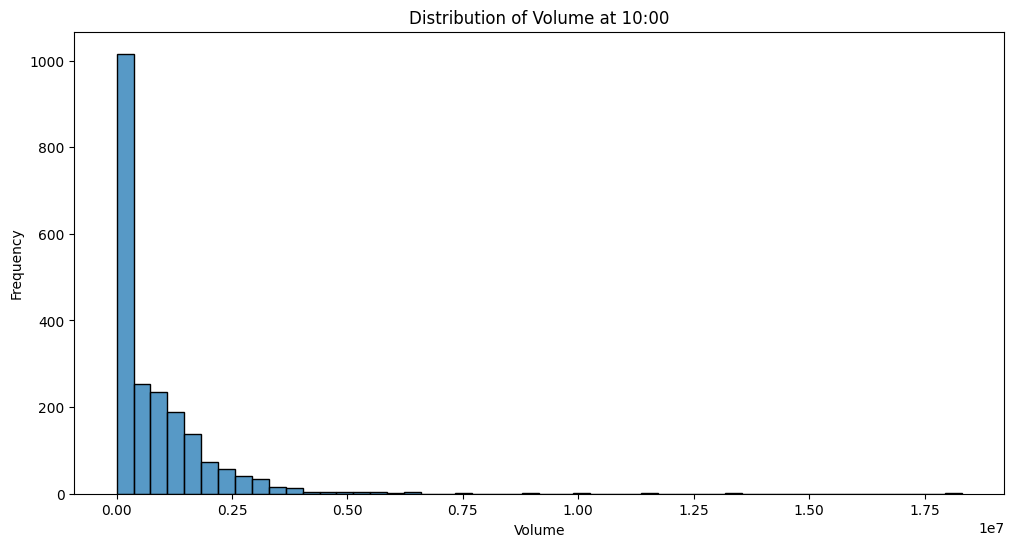

Volume distribution plot displayed.


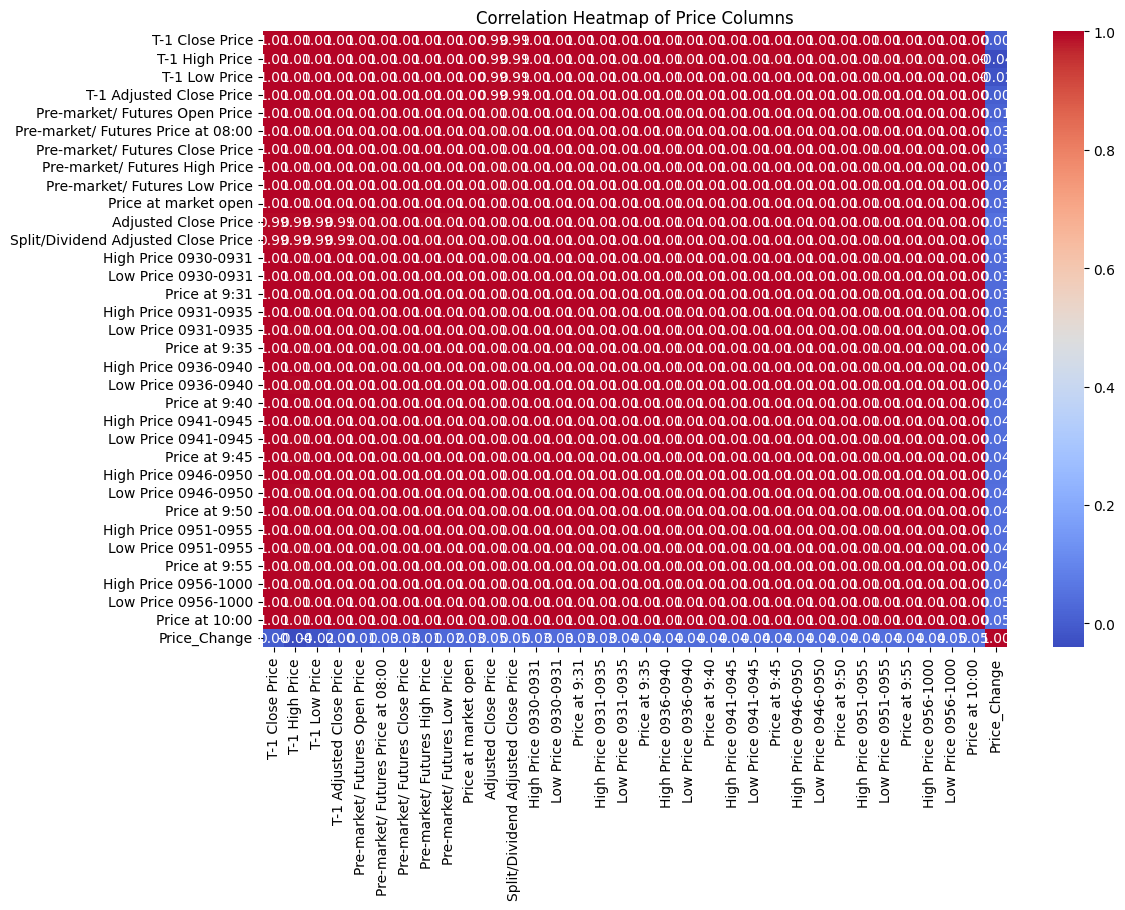

Correlation heatmap displayed.


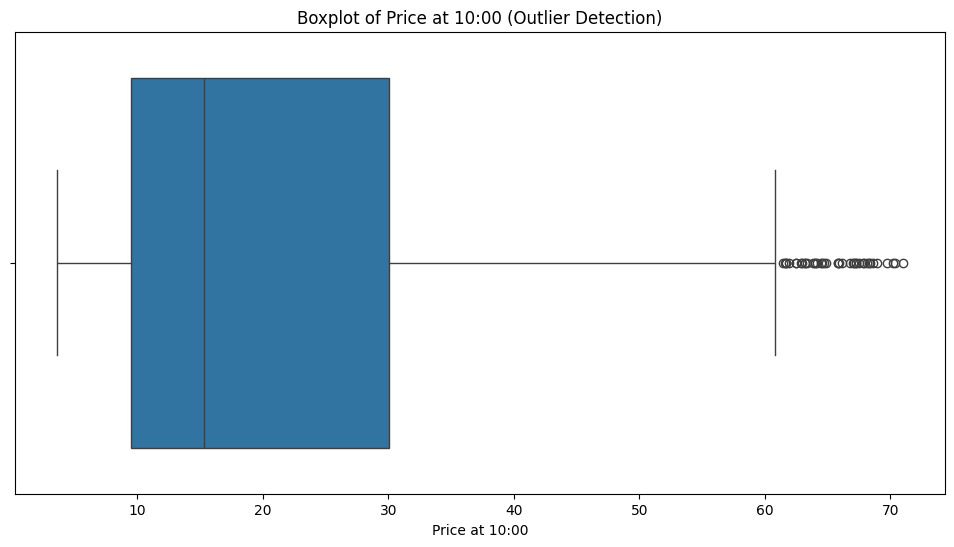

Boxplot displayed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load the CSV file
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        print("Data loaded successfully!")
        return df
    except FileNotFoundError:
        print("Error: File not found. Please check the file path.")
        return None
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Basic data inspection
def inspect_data(df):
    print("\n=== Basic Data Inspection ===")
    print("\n1. DataFrame Info:")
    print(df.info())
    print("\n2. First 5 Rows:")
    print(df.head())
    print("\n3. Missing Values:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])
    print("\n4. Summary Statistics:")
    print(df.describe())
    print("\n5. Unique Tickers and Date Range:")
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"Unique Tickers: {df['Ticker'].nunique()}")
    print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")

# Data validation
def validate_data(df):
    print("\n=== Data Validation ===")
    price_columns = [col for col in df.columns if 'Price' in col or 'Volume' in col]
    for col in price_columns:
        if (df[col] < 0).any():
            print(f"Warning: Negative values found in {col}")
    time_intervals = [
        ('High Price 0930-0931', 'Low Price 0930-0931'),
        ('High Price 0931-0935', 'Low Price 0931-0935'),
        ('High Price 0936-0940', 'Low Price 0936-0940'),
        ('High Price 0941-0945', 'Low Price 0941-0945'),
        ('High Price 0946-0950', 'Low Price 0946-0950'),
        ('High Price 0951-0955', 'Low Price 0951-0955'),
        ('High Price 0956-1000', 'Low Price 0956-1000'),
        ('Pre-market/ Futures High Price', 'Pre-market/ Futures Low Price'),
        ('T-1 High Price', 'T-1 Low Price')
    ]
    for high_col, low_col in time_intervals:
        inconsistencies = df[df[high_col] < df[low_col]]
        if not inconsistencies.empty:
            print(f"Warning: {len(inconsistencies)} cases where {high_col} < {low_col}")

# Deep learning-specific inspections
def deep_learning_inspections(df):
    print("\n=== Deep Learning-Specific Inspections ===")

    # 1. Stationarity Check (ADF Test) for Price at 10:00
    print("\n1. Stationarity Check (ADF Test) for Price at 10:00:")
    sample_ticker = df['Ticker'].iloc[0]
    sample_data = df[df['Ticker'] == sample_ticker]['Price at 10:00'].copy()

    # Check for NaN and Inf values
    nan_count = sample_data.isna().sum()
    inf_count = np.isinf(sample_data).sum()
    print(f"NaN values in Price at 10:00 for {sample_ticker}: {nan_count}")
    print(f"Inf values in Price at 10:00 for {sample_ticker}: {inf_count}")

    # Handle NaN/Inf by dropping rows
    original_len = len(sample_data)
    sample_data = sample_data.replace([np.inf, -np.inf], np.nan).dropna()
    cleaned_len = len(sample_data)
    print(f"Dropped {original_len - cleaned_len} rows due to NaN/Inf values.")

    if len(sample_data) > 1:
        try:
            adf_result = adfuller(sample_data)
            print(f"ADF Statistic: {adf_result[0]:.4f}")
            print(f"p-value: {adf_result[1]:.4f}")
            print("Interpretation: p-value < 0.05 suggests stationary data.")
        except Exception as e:
            print(f"ADF Test failed: {e}")
    else:
        print("Insufficient valid data for ADF test after cleaning.")

    # 2. Feature Scaling Needs
    print("\n2. Feature Scaling Needs (Range of Numerical Features):")
    numerical_cols = df.select_dtypes(include=['float64']).columns
    ranges = df[numerical_cols].agg(['min', 'max']).T
    print(ranges)

    # 3. Autocorrelation for Price at 10:00
    print("\n3. Autocorrelation Plot for Price at 10:00:")
    if len(sample_data) > 1:
        try:
            plt.figure(figsize=(12, 6))
            plot_acf(sample_data, lags=20)
            plt.title(f'Autocorrelation of Price at 10:00 for {sample_ticker}')
            plt.show()  # Display plot instead of saving
            print("Autocorrelation plot displayed.")
        except Exception as e:
            print(f"Failed to display autocorrelation plot: {e}")
    else:
        print("Insufficient valid data for autocorrelation plot.")

    # 4. Outlier Detection using IQR
    print("\n4. Outlier Detection (Price at 10:00):")
    Q1 = df['Price at 10:00'].quantile(0.25)
    Q3 = df['Price at 10:00'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['Price at 10:00'] < Q1 - 1.5 * IQR) | (df['Price at 10:00'] > Q3 + 1.5 * IQR)]
    print(f"Number of outliers in Price at 10:00: {len(outliers)}")

    # 5. Class Imbalance Check (Price Movement)
    print("\n5. Class Imbalance Check (Price Movement):")
    df['Price_Change'] = df['Price at 10:00'].diff()
    df['Direction'] = np.where(df['Price_Change'] > 0, 'Up', 'Down')
    class_counts = df['Direction'].value_counts(normalize=True)
    print(class_counts)

    # 6. Data Leakage Check
    print("\n6. Data Leakage Check:")
    time_ordered_cols = [
        'T-1 Close Price', 'Pre-market/ Futures Open Price', 'Price at market open',
        'Price at 9:31', 'Price at 9:35', 'Price at 9:40', 'Price at 9:45',
        'Price at 9:50', 'Price at 9:55', 'Price at 10:00'
    ]
    print("Ensure features used for predicting 'Price at 10:00' do not include later prices.")
    print("Time-ordered price columns:", time_ordered_cols)

    # 7. Feature Correlation with Target
    print("\n7. Feature Correlation with Target (Price at 10:00):")
    price_cols = [col for col in df.columns if 'Price' in col]
    correlations = df[price_cols].corr()['Price at 10:00'].sort_values(ascending=False)
    print(correlations)

    # 8. Data Volume per Ticker
    print("\n8. Data Volume per Ticker:")
    ticker_counts = df['Ticker'].value_counts()
    print(ticker_counts.head(10))
    print(f"Minimum records per ticker: {ticker_counts.min()}")
    print("Note: Deep learning models typically need >1000 records per ticker.")

# Visualization function
def visualize_data(df):
    print("\n=== Visualization ===")

    # 1. Price trend for a sample ticker
    sample_ticker = df['Ticker'].iloc[0]
    sample_data = df[df['Ticker'] == sample_ticker]
    try:
        plt.figure(figsize=(12, 6))
        plt.plot(sample_data['Date'], sample_data['Price at 10:00'], label='Price at 10:00')
        plt.title(f'Price Trend for {sample_ticker}')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()  # Display plot instead of saving
        print("Price trend plot displayed.")
    except Exception as e:
        print(f"Failed to display price trend plot: {e}")

    # 2. Volume distribution
    try:
        plt.figure(figsize=(12, 6))
        sns.histplot(df['Volume at 10:00'], bins=50)
        plt.title('Distribution of Volume at 10:00')
        plt.xlabel('Volume')
        plt.ylabel('Frequency')
        plt.show()  # Display plot instead of saving
        print("Volume distribution plot displayed.")
    except Exception as e:
        print(f"Failed to display volume distribution plot: {e}")

    # 3. Correlation heatmap for price columns
    try:
        price_cols = [col for col in df.columns if 'Price' in col]
        correlation_matrix = df[price_cols].corr()
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Heatmap of Price Columns')
        plt.show()  # Display plot instead of saving
        print("Correlation heatmap displayed.")
    except Exception as e:
        print(f"Failed to display correlation heatmap: {e}")

    # 4. Boxplot for outlier visualization
    try:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=df['Price at 10:00'])
        plt.title('Boxplot of Price at 10:00 (Outlier Detection)')
        plt.show()  # Display plot instead of saving
        print("Boxplot displayed.")
    except Exception as e:
        print(f"Failed to display boxplot: {e}")

# Main function
def main():
    file_path = 'SOXL_finance_data_2017-01-01_to_2025-06-20 (1).csv'  # Replace with your CSV file path
    df = load_data(file_path)
    if df is not None:
        inspect_data(df)
        validate_data(df)
        deep_learning_inspections(df)
        visualize_data(df)

if __name__ == "__main__":
    main()

## TQQQ inspection

Data loaded successfully!

=== Basic Data Inspection ===

1. DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151 entries, 0 to 2150
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   2151 non-null   object 
 1   Date                                 2151 non-null   object 
 2   Ticker                               2151 non-null   object 
 3   T-1 Close Price                      2100 non-null   float64
 4   T-1 High Price                       2100 non-null   float64
 5   T-1 Low Price                        2100 non-null   float64
 6   T-1 Volume                           2100 non-null   float64
 7   T-1 Adjusted Close Price             2100 non-null   float64
 8   T-1 Adjusted Volume                  2100 non-null   float64
 9   Pre-market/ Futures Open Price       2099 non-null   float64
 10  Pre-market/ Futures

<Figure size 1200x600 with 0 Axes>

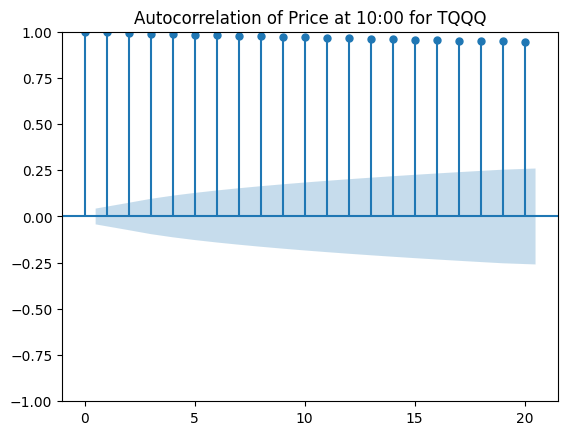

Autocorrelation plot displayed.

4. Outlier Detection (Price at 10:00):
Number of outliers in Price at 10:00: 3

5. Class Imbalance Check (Price Movement):
Direction
Up     0.54
Down   0.46
Name: proportion, dtype: float64

6. Data Leakage Check:
Ensure features used for predicting 'Price at 10:00' do not include later prices.
Time-ordered price columns: ['T-1 Close Price', 'Pre-market/ Futures Open Price', 'Price at market open', 'Price at 9:31', 'Price at 9:35', 'Price at 9:40', 'Price at 9:45', 'Price at 9:50', 'Price at 9:55', 'Price at 10:00']

7. Feature Correlation with Target (Price at 10:00):
Price at 10:00                        1.00
Low Price 0956-1000                   1.00
High Price 0956-1000                  1.00
Price at 9:55                         1.00
Low Price 0951-0955                   1.00
High Price 0951-0955                  1.00
Price at 9:50                         1.00
High Price 0946-0950                  1.00
Low Price 0946-0950                   1.00
Pric

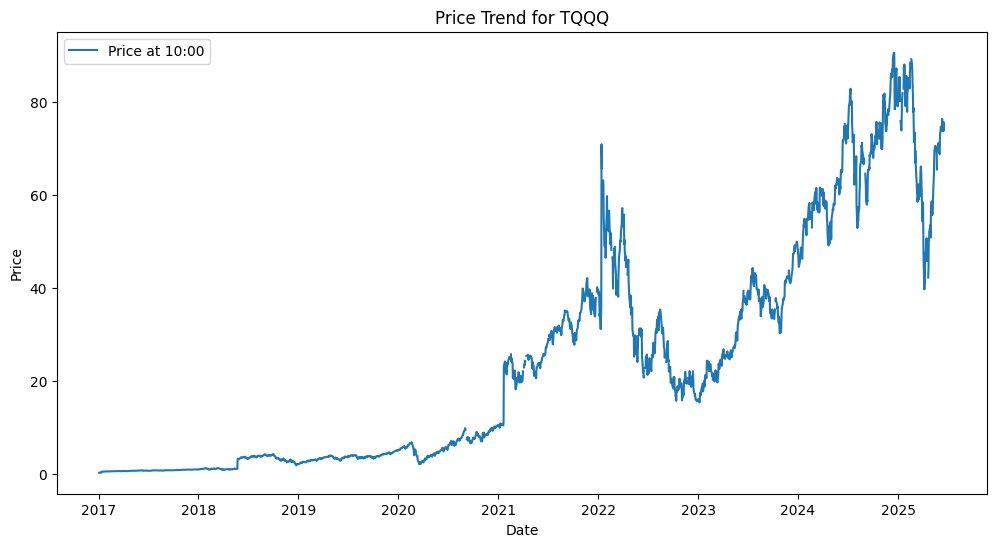

Price trend plot displayed.


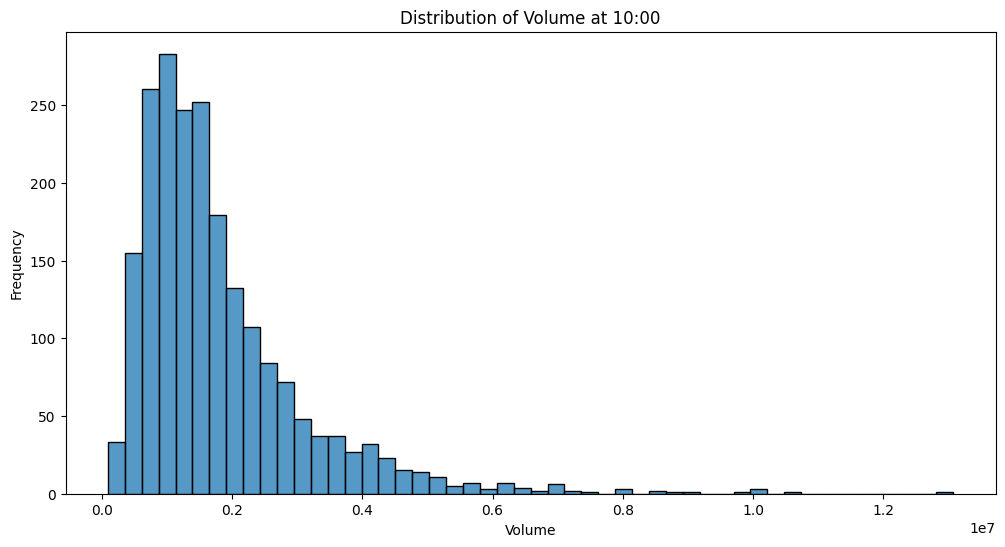

Volume distribution plot displayed.


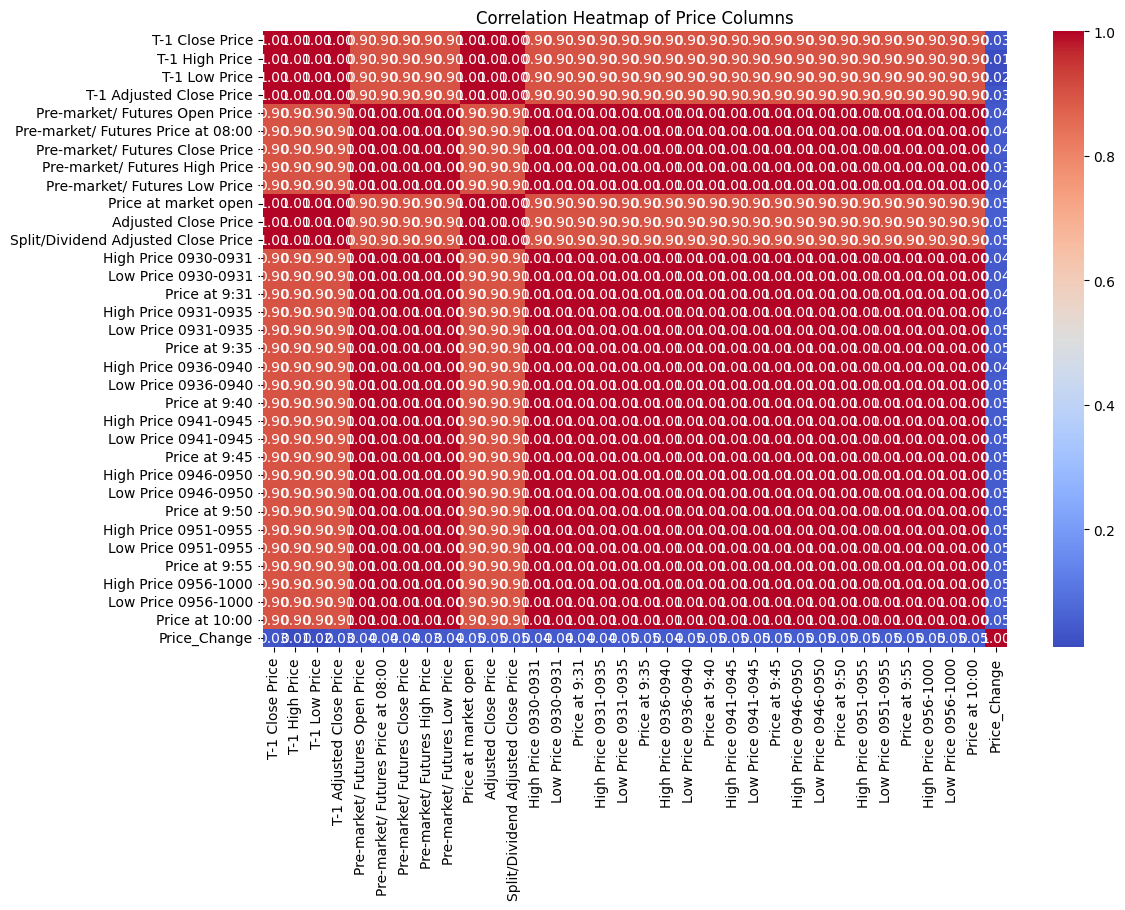

Correlation heatmap displayed.


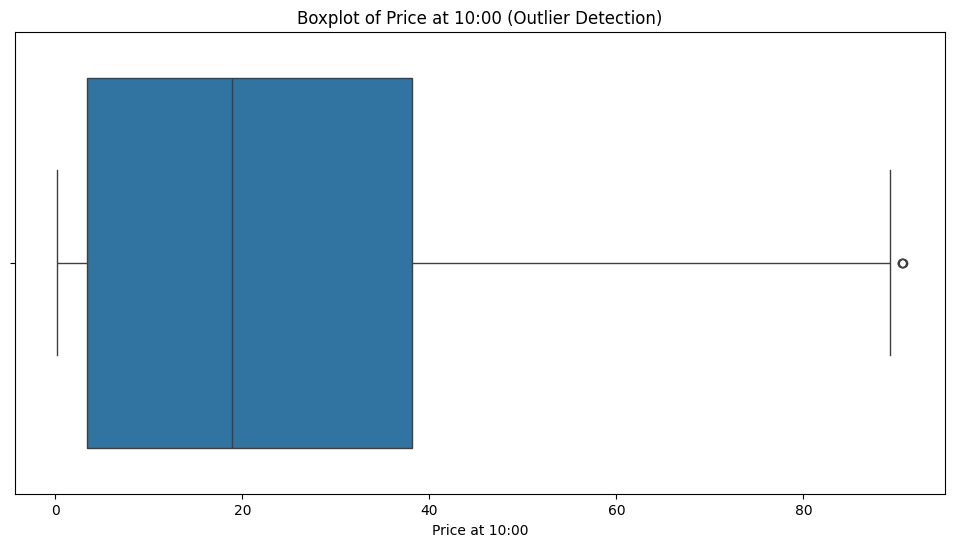

Boxplot displayed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load the CSV file
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        print("Data loaded successfully!")
        return df
    except FileNotFoundError:
        print("Error: File not found. Please check the file path.")
        return None
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Basic data inspection
def inspect_data(df):
    print("\n=== Basic Data Inspection ===")
    print("\n1. DataFrame Info:")
    print(df.info())
    print("\n2. First 5 Rows:")
    print(df.head())
    print("\n3. Missing Values:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])
    print("\n4. Summary Statistics:")
    print(df.describe())
    print("\n5. Unique Tickers and Date Range:")
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"Unique Tickers: {df['Ticker'].nunique()}")
    print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")

# Data validation
def validate_data(df):
    print("\n=== Data Validation ===")
    price_columns = [col for col in df.columns if 'Price' in col or 'Volume' in col]
    for col in price_columns:
        if (df[col] < 0).any():
            print(f"Warning: Negative values found in {col}")
    time_intervals = [
        ('High Price 0930-0931', 'Low Price 0930-0931'),
        ('High Price 0931-0935', 'Low Price 0931-0935'),
        ('High Price 0936-0940', 'Low Price 0936-0940'),
        ('High Price 0941-0945', 'Low Price 0941-0945'),
        ('High Price 0946-0950', 'Low Price 0946-0950'),
        ('High Price 0951-0955', 'Low Price 0951-0955'),
        ('High Price 0956-1000', 'Low Price 0956-1000'),
        ('Pre-market/ Futures High Price', 'Pre-market/ Futures Low Price'),
        ('T-1 High Price', 'T-1 Low Price')
    ]
    for high_col, low_col in time_intervals:
        inconsistencies = df[df[high_col] < df[low_col]]
        if not inconsistencies.empty:
            print(f"Warning: {len(inconsistencies)} cases where {high_col} < {low_col}")

# Deep learning-specific inspections
def deep_learning_inspections(df):
    print("\n=== Deep Learning-Specific Inspections ===")

    # 1. Stationarity Check (ADF Test) for Price at 10:00
    print("\n1. Stationarity Check (ADF Test) for Price at 10:00:")
    sample_ticker = df['Ticker'].iloc[0]
    sample_data = df[df['Ticker'] == sample_ticker]['Price at 10:00'].copy()

    # Check for NaN and Inf values
    nan_count = sample_data.isna().sum()
    inf_count = np.isinf(sample_data).sum()
    print(f"NaN values in Price at 10:00 for {sample_ticker}: {nan_count}")
    print(f"Inf values in Price at 10:00 for {sample_ticker}: {inf_count}")

    # Handle NaN/Inf by dropping rows
    original_len = len(sample_data)
    sample_data = sample_data.replace([np.inf, -np.inf], np.nan).dropna()
    cleaned_len = len(sample_data)
    print(f"Dropped {original_len - cleaned_len} rows due to NaN/Inf values.")

    if len(sample_data) > 1:
        try:
            adf_result = adfuller(sample_data)
            print(f"ADF Statistic: {adf_result[0]:.4f}")
            print(f"p-value: {adf_result[1]:.4f}")
            print("Interpretation: p-value < 0.05 suggests stationary data.")
        except Exception as e:
            print(f"ADF Test failed: {e}")
    else:
        print("Insufficient valid data for ADF test after cleaning.")

    # 2. Feature Scaling Needs
    print("\n2. Feature Scaling Needs (Range of Numerical Features):")
    numerical_cols = df.select_dtypes(include=['float64']).columns
    ranges = df[numerical_cols].agg(['min', 'max']).T
    print(ranges)

    # 3. Autocorrelation for Price at 10:00
    print("\n3. Autocorrelation Plot for Price at 10:00:")
    if len(sample_data) > 1:
        try:
            plt.figure(figsize=(12, 6))
            plot_acf(sample_data, lags=20)
            plt.title(f'Autocorrelation of Price at 10:00 for {sample_ticker}')
            plt.show()  # Display plot instead of saving
            print("Autocorrelation plot displayed.")
        except Exception as e:
            print(f"Failed to display autocorrelation plot: {e}")
    else:
        print("Insufficient valid data for autocorrelation plot.")

    # 4. Outlier Detection using IQR
    print("\n4. Outlier Detection (Price at 10:00):")
    Q1 = df['Price at 10:00'].quantile(0.25)
    Q3 = df['Price at 10:00'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['Price at 10:00'] < Q1 - 1.5 * IQR) | (df['Price at 10:00'] > Q3 + 1.5 * IQR)]
    print(f"Number of outliers in Price at 10:00: {len(outliers)}")

    # 5. Class Imbalance Check (Price Movement)
    print("\n5. Class Imbalance Check (Price Movement):")
    df['Price_Change'] = df['Price at 10:00'].diff()
    df['Direction'] = np.where(df['Price_Change'] > 0, 'Up', 'Down')
    class_counts = df['Direction'].value_counts(normalize=True)
    print(class_counts)

    # 6. Data Leakage Check
    print("\n6. Data Leakage Check:")
    time_ordered_cols = [
        'T-1 Close Price', 'Pre-market/ Futures Open Price', 'Price at market open',
        'Price at 9:31', 'Price at 9:35', 'Price at 9:40', 'Price at 9:45',
        'Price at 9:50', 'Price at 9:55', 'Price at 10:00'
    ]
    print("Ensure features used for predicting 'Price at 10:00' do not include later prices.")
    print("Time-ordered price columns:", time_ordered_cols)

    # 7. Feature Correlation with Target
    print("\n7. Feature Correlation with Target (Price at 10:00):")
    price_cols = [col for col in df.columns if 'Price' in col]
    correlations = df[price_cols].corr()['Price at 10:00'].sort_values(ascending=False)
    print(correlations)

    # 8. Data Volume per Ticker
    print("\n8. Data Volume per Ticker:")
    ticker_counts = df['Ticker'].value_counts()
    print(ticker_counts.head(10))
    print(f"Minimum records per ticker: {ticker_counts.min()}")
    print("Note: Deep learning models typically need >1000 records per ticker.")

# Visualization function
def visualize_data(df):
    print("\n=== Visualization ===")

    # 1. Price trend for a sample ticker
    sample_ticker = df['Ticker'].iloc[0]
    sample_data = df[df['Ticker'] == sample_ticker]
    try:
        plt.figure(figsize=(12, 6))
        plt.plot(sample_data['Date'], sample_data['Price at 10:00'], label='Price at 10:00')
        plt.title(f'Price Trend for {sample_ticker}')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()  # Display plot instead of saving
        print("Price trend plot displayed.")
    except Exception as e:
        print(f"Failed to display price trend plot: {e}")

    # 2. Volume distribution
    try:
        plt.figure(figsize=(12, 6))
        sns.histplot(df['Volume at 10:00'], bins=50)
        plt.title('Distribution of Volume at 10:00')
        plt.xlabel('Volume')
        plt.ylabel('Frequency')
        plt.show()  # Display plot instead of saving
        print("Volume distribution plot displayed.")
    except Exception as e:
        print(f"Failed to display volume distribution plot: {e}")

    # 3. Correlation heatmap for price columns
    try:
        price_cols = [col for col in df.columns if 'Price' in col]
        correlation_matrix = df[price_cols].corr()
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Heatmap of Price Columns')
        plt.show()  # Display plot instead of saving
        print("Correlation heatmap displayed.")
    except Exception as e:
        print(f"Failed to display correlation heatmap: {e}")

    # 4. Boxplot for outlier visualization
    try:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=df['Price at 10:00'])
        plt.title('Boxplot of Price at 10:00 (Outlier Detection)')
        plt.show()  # Display plot instead of saving
        print("Boxplot displayed.")
    except Exception as e:
        print(f"Failed to display boxplot: {e}")

# Main function
def main():
    file_path = 'TQQQ_finance_data_2017-01-01_to_2025-06-20.csv'  # Replace with your CSV file path
    df = load_data(file_path)
    if df is not None:
        inspect_data(df)
        validate_data(df)
        deep_learning_inspections(df)
        visualize_data(df)

if __name__ == "__main__":
    main()

## UVXY inspection

Data loaded successfully!

=== Basic Data Inspection ===

1. DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151 entries, 0 to 2150
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   2151 non-null   object 
 1   Date                                 2151 non-null   object 
 2   Ticker                               2151 non-null   object 
 3   T-1 Close Price                      2100 non-null   float64
 4   T-1 High Price                       2100 non-null   float64
 5   T-1 Low Price                        2100 non-null   float64
 6   T-1 Volume                           2100 non-null   float64
 7   T-1 Adjusted Close Price             2100 non-null   float64
 8   T-1 Adjusted Volume                  2100 non-null   float64
 9   Pre-market/ Futures Open Price       2100 non-null   float64
 10  Pre-market/ Futures

<Figure size 1200x600 with 0 Axes>

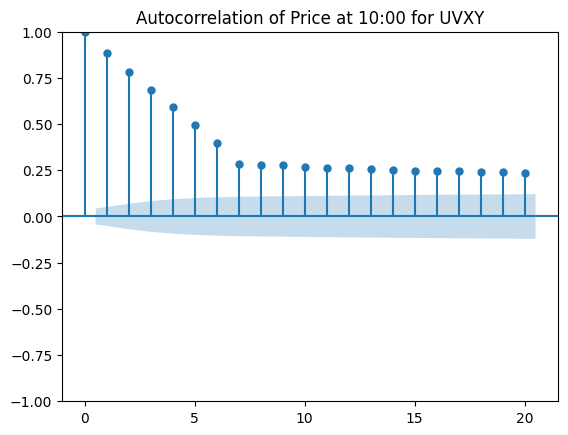

Autocorrelation plot displayed.

4. Outlier Detection (Price at 10:00):
Number of outliers in Price at 10:00: 427

5. Class Imbalance Check (Price Movement):
Direction
Down   0.60
Up     0.40
Name: proportion, dtype: float64

6. Data Leakage Check:
Ensure features used for predicting 'Price at 10:00' do not include later prices.
Time-ordered price columns: ['T-1 Close Price', 'Pre-market/ Futures Open Price', 'Price at market open', 'Price at 9:31', 'Price at 9:35', 'Price at 9:40', 'Price at 9:45', 'Price at 9:50', 'Price at 9:55', 'Price at 10:00']

7. Feature Correlation with Target (Price at 10:00):
Price at 10:00                         1.00
Low Price 0956-1000                    1.00
High Price 0956-1000                   1.00
Price at 9:55                          1.00
Low Price 0951-0955                    1.00
High Price 0951-0955                   1.00
Price at 9:45                          1.00
Low Price 0946-0950                    1.00
Low Price 0941-0945                  

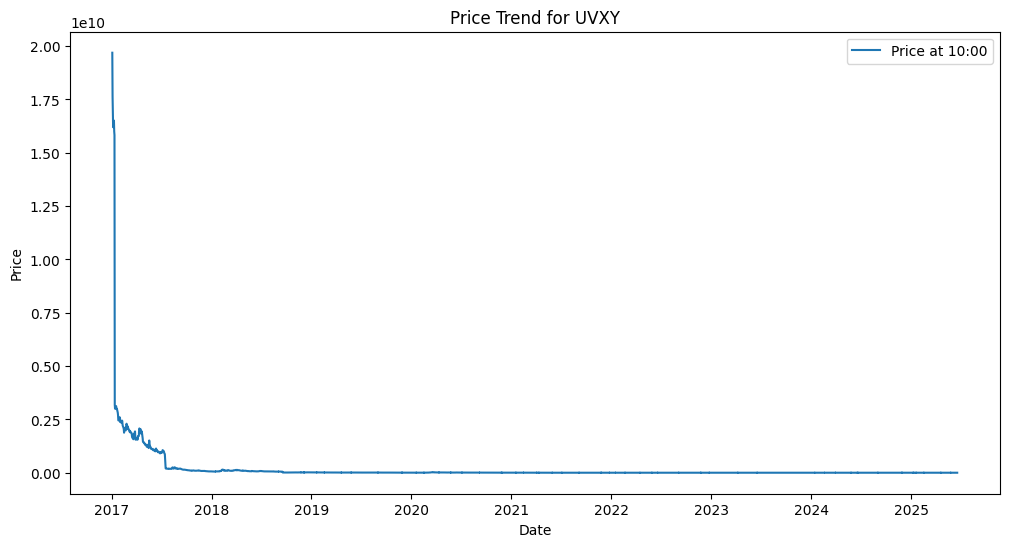

Price trend plot displayed.


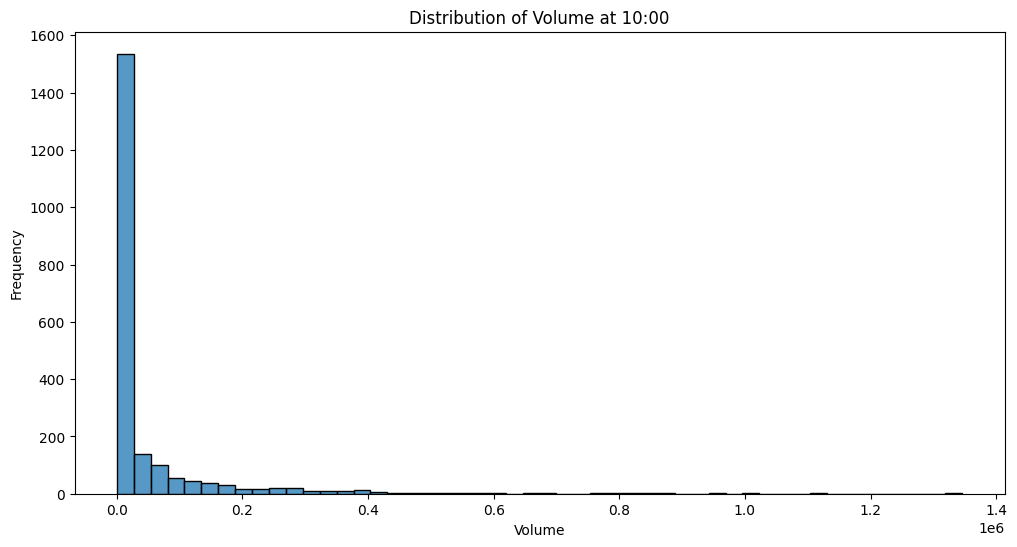

Volume distribution plot displayed.


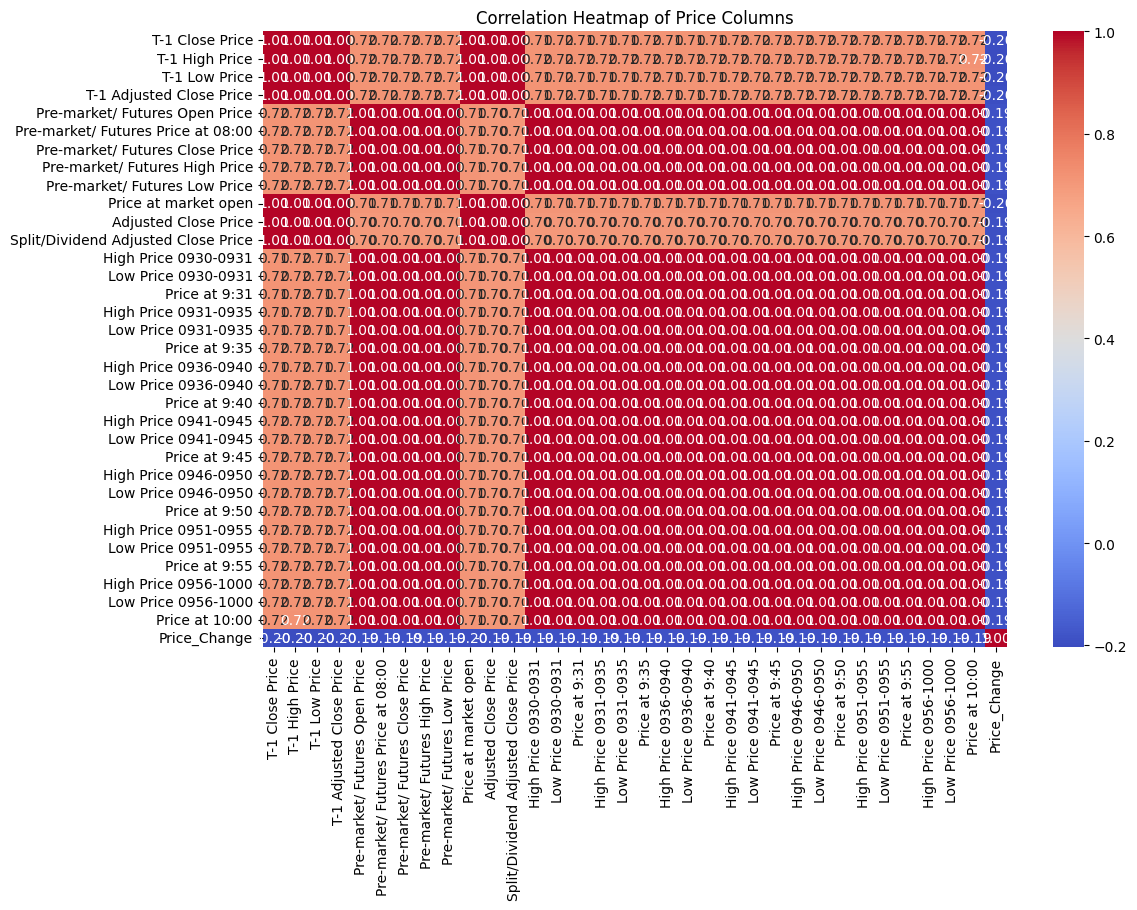

Correlation heatmap displayed.


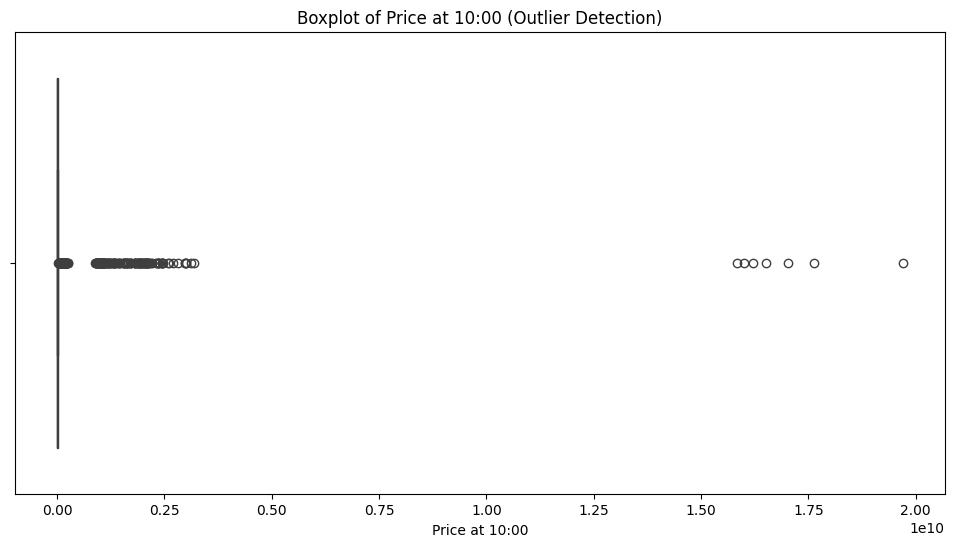

Boxplot displayed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load the CSV file
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        print("Data loaded successfully!")
        return df
    except FileNotFoundError:
        print("Error: File not found. Please check the file path.")
        return None
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Basic data inspection
def inspect_data(df):
    print("\n=== Basic Data Inspection ===")
    print("\n1. DataFrame Info:")
    print(df.info())
    print("\n2. First 5 Rows:")
    print(df.head())
    print("\n3. Missing Values:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])
    print("\n4. Summary Statistics:")
    print(df.describe())
    print("\n5. Unique Tickers and Date Range:")
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"Unique Tickers: {df['Ticker'].nunique()}")
    print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")

# Data validation
def validate_data(df):
    print("\n=== Data Validation ===")
    price_columns = [col for col in df.columns if 'Price' in col or 'Volume' in col]
    for col in price_columns:
        if (df[col] < 0).any():
            print(f"Warning: Negative values found in {col}")
    time_intervals = [
        ('High Price 0930-0931', 'Low Price 0930-0931'),
        ('High Price 0931-0935', 'Low Price 0931-0935'),
        ('High Price 0936-0940', 'Low Price 0936-0940'),
        ('High Price 0941-0945', 'Low Price 0941-0945'),
        ('High Price 0946-0950', 'Low Price 0946-0950'),
        ('High Price 0951-0955', 'Low Price 0951-0955'),
        ('High Price 0956-1000', 'Low Price 0956-1000'),
        ('Pre-market/ Futures High Price', 'Pre-market/ Futures Low Price'),
        ('T-1 High Price', 'T-1 Low Price')
    ]
    for high_col, low_col in time_intervals:
        inconsistencies = df[df[high_col] < df[low_col]]
        if not inconsistencies.empty:
            print(f"Warning: {len(inconsistencies)} cases where {high_col} < {low_col}")

# Deep learning-specific inspections
def deep_learning_inspections(df):
    print("\n=== Deep Learning-Specific Inspections ===")

    # 1. Stationarity Check (ADF Test) for Price at 10:00
    print("\n1. Stationarity Check (ADF Test) for Price at 10:00:")
    sample_ticker = df['Ticker'].iloc[0]
    sample_data = df[df['Ticker'] == sample_ticker]['Price at 10:00'].copy()

    # Check for NaN and Inf values
    nan_count = sample_data.isna().sum()
    inf_count = np.isinf(sample_data).sum()
    print(f"NaN values in Price at 10:00 for {sample_ticker}: {nan_count}")
    print(f"Inf values in Price at 10:00 for {sample_ticker}: {inf_count}")

    # Handle NaN/Inf by dropping rows
    original_len = len(sample_data)
    sample_data = sample_data.replace([np.inf, -np.inf], np.nan).dropna()
    cleaned_len = len(sample_data)
    print(f"Dropped {original_len - cleaned_len} rows due to NaN/Inf values.")

    if len(sample_data) > 1:
        try:
            adf_result = adfuller(sample_data)
            print(f"ADF Statistic: {adf_result[0]:.4f}")
            print(f"p-value: {adf_result[1]:.4f}")
            print("Interpretation: p-value < 0.05 suggests stationary data.")
        except Exception as e:
            print(f"ADF Test failed: {e}")
    else:
        print("Insufficient valid data for ADF test after cleaning.")

    # 2. Feature Scaling Needs
    print("\n2. Feature Scaling Needs (Range of Numerical Features):")
    numerical_cols = df.select_dtypes(include=['float64']).columns
    ranges = df[numerical_cols].agg(['min', 'max']).T
    print(ranges)

    # 3. Autocorrelation for Price at 10:00
    print("\n3. Autocorrelation Plot for Price at 10:00:")
    if len(sample_data) > 1:
        try:
            plt.figure(figsize=(12, 6))
            plot_acf(sample_data, lags=20)
            plt.title(f'Autocorrelation of Price at 10:00 for {sample_ticker}')
            plt.show()  # Display plot instead of saving
            print("Autocorrelation plot displayed.")
        except Exception as e:
            print(f"Failed to display autocorrelation plot: {e}")
    else:
        print("Insufficient valid data for autocorrelation plot.")

    # 4. Outlier Detection using IQR
    print("\n4. Outlier Detection (Price at 10:00):")
    Q1 = df['Price at 10:00'].quantile(0.25)
    Q3 = df['Price at 10:00'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['Price at 10:00'] < Q1 - 1.5 * IQR) | (df['Price at 10:00'] > Q3 + 1.5 * IQR)]
    print(f"Number of outliers in Price at 10:00: {len(outliers)}")

    # 5. Class Imbalance Check (Price Movement)
    print("\n5. Class Imbalance Check (Price Movement):")
    df['Price_Change'] = df['Price at 10:00'].diff()
    df['Direction'] = np.where(df['Price_Change'] > 0, 'Up', 'Down')
    class_counts = df['Direction'].value_counts(normalize=True)
    print(class_counts)

    # 6. Data Leakage Check
    print("\n6. Data Leakage Check:")
    time_ordered_cols = [
        'T-1 Close Price', 'Pre-market/ Futures Open Price', 'Price at market open',
        'Price at 9:31', 'Price at 9:35', 'Price at 9:40', 'Price at 9:45',
        'Price at 9:50', 'Price at 9:55', 'Price at 10:00'
    ]
    print("Ensure features used for predicting 'Price at 10:00' do not include later prices.")
    print("Time-ordered price columns:", time_ordered_cols)

    # 7. Feature Correlation with Target
    print("\n7. Feature Correlation with Target (Price at 10:00):")
    price_cols = [col for col in df.columns if 'Price' in col]
    correlations = df[price_cols].corr()['Price at 10:00'].sort_values(ascending=False)
    print(correlations)

    # 8. Data Volume per Ticker
    print("\n8. Data Volume per Ticker:")
    ticker_counts = df['Ticker'].value_counts()
    print(ticker_counts.head(10))
    print(f"Minimum records per ticker: {ticker_counts.min()}")
    print("Note: Deep learning models typically need >1000 records per ticker.")

# Visualization function
def visualize_data(df):
    print("\n=== Visualization ===")

    # 1. Price trend for a sample ticker
    sample_ticker = df['Ticker'].iloc[0]
    sample_data = df[df['Ticker'] == sample_ticker]
    try:
        plt.figure(figsize=(12, 6))
        plt.plot(sample_data['Date'], sample_data['Price at 10:00'], label='Price at 10:00')
        plt.title(f'Price Trend for {sample_ticker}')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()  # Display plot instead of saving
        print("Price trend plot displayed.")
    except Exception as e:
        print(f"Failed to display price trend plot: {e}")

    # 2. Volume distribution
    try:
        plt.figure(figsize=(12, 6))
        sns.histplot(df['Volume at 10:00'], bins=50)
        plt.title('Distribution of Volume at 10:00')
        plt.xlabel('Volume')
        plt.ylabel('Frequency')
        plt.show()  # Display plot instead of saving
        print("Volume distribution plot displayed.")
    except Exception as e:
        print(f"Failed to display volume distribution plot: {e}")

    # 3. Correlation heatmap for price columns
    try:
        price_cols = [col for col in df.columns if 'Price' in col]
        correlation_matrix = df[price_cols].corr()
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Heatmap of Price Columns')
        plt.show()  # Display plot instead of saving
        print("Correlation heatmap displayed.")
    except Exception as e:
        print(f"Failed to display correlation heatmap: {e}")

    # 4. Boxplot for outlier visualization
    try:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=df['Price at 10:00'])
        plt.title('Boxplot of Price at 10:00 (Outlier Detection)')
        plt.show()  # Display plot instead of saving
        print("Boxplot displayed.")
    except Exception as e:
        print(f"Failed to display boxplot: {e}")

# Main function
def main():
    file_path = 'UVXY_finance_data_2017-01-01_to_2025-06-20.csv'  # Replace with your CSV file path
    df = load_data(file_path)
    if df is not None:
        inspect_data(df)
        validate_data(df)
        deep_learning_inspections(df)
        visualize_data(df)

if __name__ == "__main__":
    main()

## VXX inspection

Data loaded successfully!

=== Basic Data Inspection ===

1. DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151 entries, 0 to 2150
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   2151 non-null   object 
 1   Date                                 2151 non-null   object 
 2   Ticker                               2151 non-null   object 
 3   T-1 Close Price                      2100 non-null   float64
 4   T-1 High Price                       2100 non-null   float64
 5   T-1 Low Price                        2100 non-null   float64
 6   T-1 Volume                           2100 non-null   float64
 7   T-1 Adjusted Close Price             2100 non-null   float64
 8   T-1 Adjusted Volume                  2100 non-null   float64
 9   Pre-market/ Futures Open Price       2100 non-null   float64
 10  Pre-market/ Futures

<Figure size 1200x600 with 0 Axes>

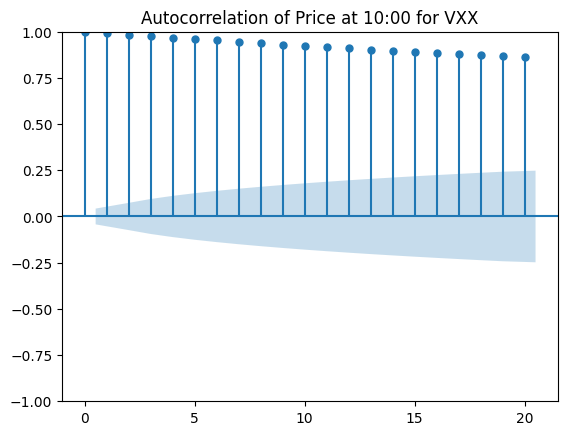

Autocorrelation plot displayed.

4. Outlier Detection (Price at 10:00):
Number of outliers in Price at 10:00: 161

5. Class Imbalance Check (Price Movement):
Direction
Down   0.60
Up     0.40
Name: proportion, dtype: float64

6. Data Leakage Check:
Ensure features used for predicting 'Price at 10:00' do not include later prices.
Time-ordered price columns: ['T-1 Close Price', 'Pre-market/ Futures Open Price', 'Price at market open', 'Price at 9:31', 'Price at 9:35', 'Price at 9:40', 'Price at 9:45', 'Price at 9:50', 'Price at 9:55', 'Price at 10:00']

7. Feature Correlation with Target (Price at 10:00):
Price at 10:00                         1.00
High Price 0956-1000                   1.00
Low Price 0956-1000                    1.00
Price at 9:55                          1.00
Low Price 0951-0955                    1.00
High Price 0951-0955                   1.00
Price at 9:50                          1.00
Low Price 0946-0950                    1.00
High Price 0946-0950                 

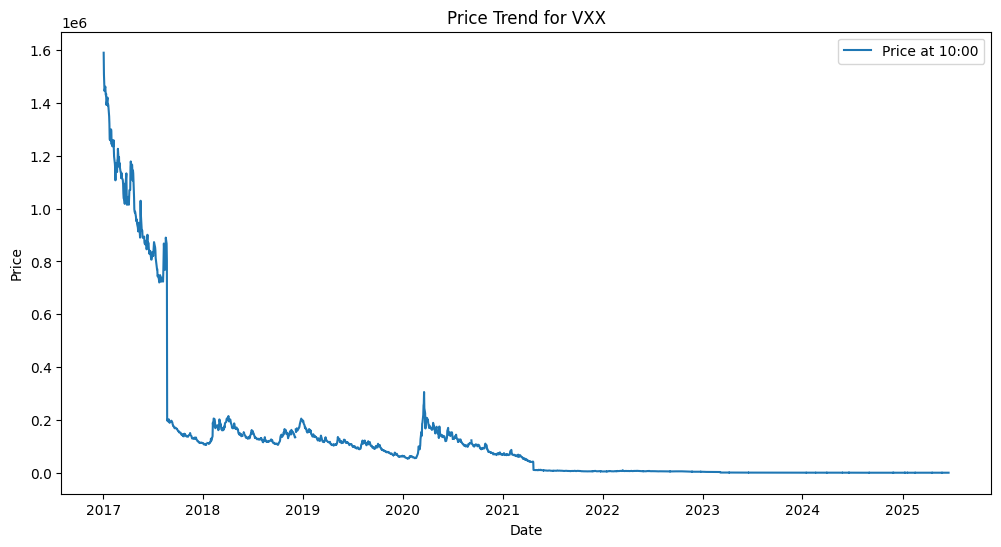

Price trend plot displayed.


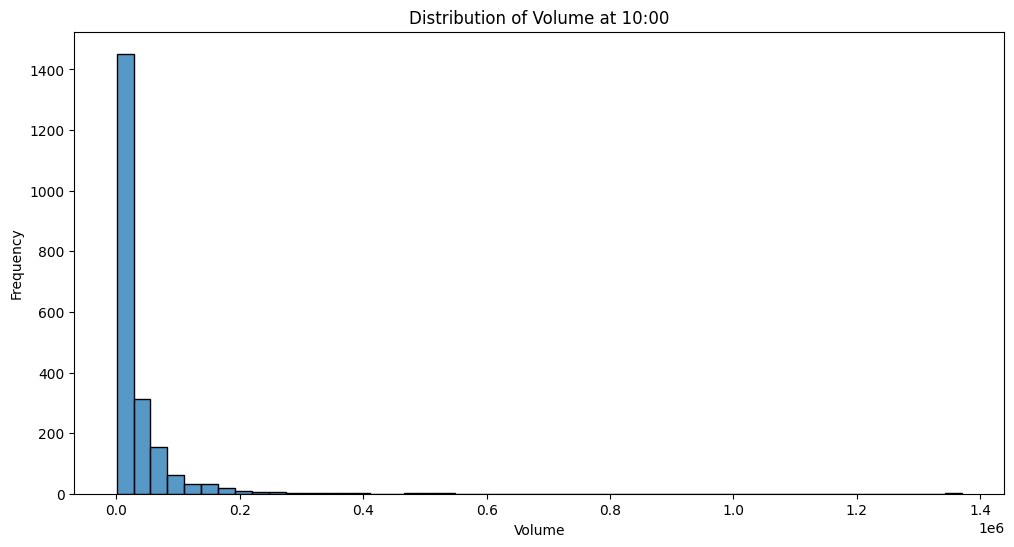

Volume distribution plot displayed.


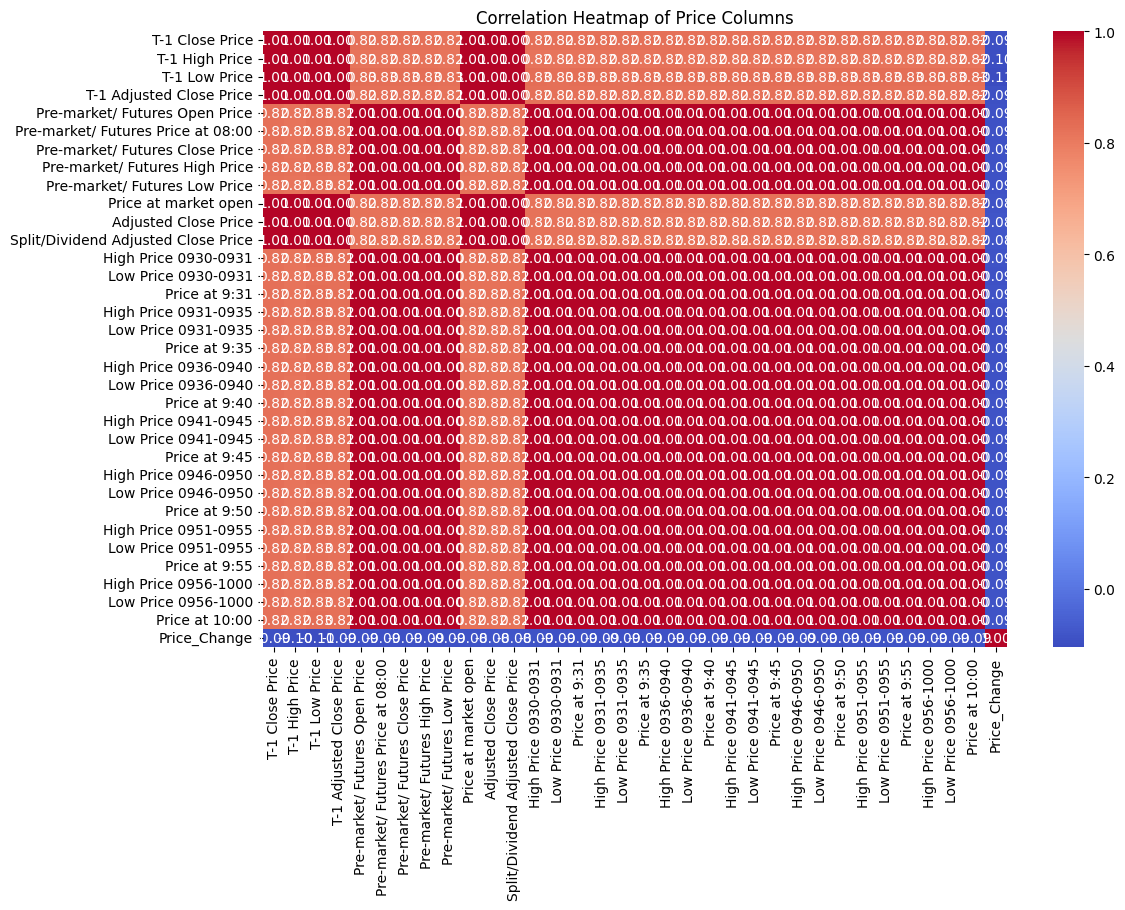

Correlation heatmap displayed.


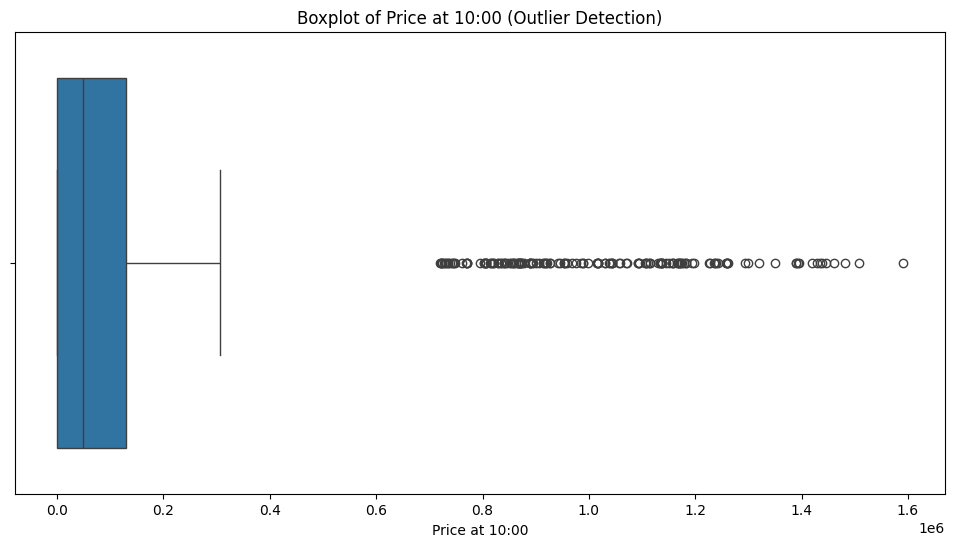

Boxplot displayed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load the CSV file
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        print("Data loaded successfully!")
        return df
    except FileNotFoundError:
        print("Error: File not found. Please check the file path.")
        return None
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Basic data inspection
def inspect_data(df):
    print("\n=== Basic Data Inspection ===")
    print("\n1. DataFrame Info:")
    print(df.info())
    print("\n2. First 5 Rows:")
    print(df.head())
    print("\n3. Missing Values:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])
    print("\n4. Summary Statistics:")
    print(df.describe())
    print("\n5. Unique Tickers and Date Range:")
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"Unique Tickers: {df['Ticker'].nunique()}")
    print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")

# Data validation
def validate_data(df):
    print("\n=== Data Validation ===")
    price_columns = [col for col in df.columns if 'Price' in col or 'Volume' in col]
    for col in price_columns:
        if (df[col] < 0).any():
            print(f"Warning: Negative values found in {col}")
    time_intervals = [
        ('High Price 0930-0931', 'Low Price 0930-0931'),
        ('High Price 0931-0935', 'Low Price 0931-0935'),
        ('High Price 0936-0940', 'Low Price 0936-0940'),
        ('High Price 0941-0945', 'Low Price 0941-0945'),
        ('High Price 0946-0950', 'Low Price 0946-0950'),
        ('High Price 0951-0955', 'Low Price 0951-0955'),
        ('High Price 0956-1000', 'Low Price 0956-1000'),
        ('Pre-market/ Futures High Price', 'Pre-market/ Futures Low Price'),
        ('T-1 High Price', 'T-1 Low Price')
    ]
    for high_col, low_col in time_intervals:
        inconsistencies = df[df[high_col] < df[low_col]]
        if not inconsistencies.empty:
            print(f"Warning: {len(inconsistencies)} cases where {high_col} < {low_col}")

# Deep learning-specific inspections
def deep_learning_inspections(df):
    print("\n=== Deep Learning-Specific Inspections ===")

    # 1. Stationarity Check (ADF Test) for Price at 10:00
    print("\n1. Stationarity Check (ADF Test) for Price at 10:00:")
    sample_ticker = df['Ticker'].iloc[0]
    sample_data = df[df['Ticker'] == sample_ticker]['Price at 10:00'].copy()

    # Check for NaN and Inf values
    nan_count = sample_data.isna().sum()
    inf_count = np.isinf(sample_data).sum()
    print(f"NaN values in Price at 10:00 for {sample_ticker}: {nan_count}")
    print(f"Inf values in Price at 10:00 for {sample_ticker}: {inf_count}")

    # Handle NaN/Inf by dropping rows
    original_len = len(sample_data)
    sample_data = sample_data.replace([np.inf, -np.inf], np.nan).dropna()
    cleaned_len = len(sample_data)
    print(f"Dropped {original_len - cleaned_len} rows due to NaN/Inf values.")

    if len(sample_data) > 1:
        try:
            adf_result = adfuller(sample_data)
            print(f"ADF Statistic: {adf_result[0]:.4f}")
            print(f"p-value: {adf_result[1]:.4f}")
            print("Interpretation: p-value < 0.05 suggests stationary data.")
        except Exception as e:
            print(f"ADF Test failed: {e}")
    else:
        print("Insufficient valid data for ADF test after cleaning.")

    # 2. Feature Scaling Needs
    print("\n2. Feature Scaling Needs (Range of Numerical Features):")
    numerical_cols = df.select_dtypes(include=['float64']).columns
    ranges = df[numerical_cols].agg(['min', 'max']).T
    print(ranges)

    # 3. Autocorrelation for Price at 10:00
    print("\n3. Autocorrelation Plot for Price at 10:00:")
    if len(sample_data) > 1:
        try:
            plt.figure(figsize=(12, 6))
            plot_acf(sample_data, lags=20)
            plt.title(f'Autocorrelation of Price at 10:00 for {sample_ticker}')
            plt.show()  # Display plot instead of saving
            print("Autocorrelation plot displayed.")
        except Exception as e:
            print(f"Failed to display autocorrelation plot: {e}")
    else:
        print("Insufficient valid data for autocorrelation plot.")

    # 4. Outlier Detection using IQR
    print("\n4. Outlier Detection (Price at 10:00):")
    Q1 = df['Price at 10:00'].quantile(0.25)
    Q3 = df['Price at 10:00'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['Price at 10:00'] < Q1 - 1.5 * IQR) | (df['Price at 10:00'] > Q3 + 1.5 * IQR)]
    print(f"Number of outliers in Price at 10:00: {len(outliers)}")

    # 5. Class Imbalance Check (Price Movement)
    print("\n5. Class Imbalance Check (Price Movement):")
    df['Price_Change'] = df['Price at 10:00'].diff()
    df['Direction'] = np.where(df['Price_Change'] > 0, 'Up', 'Down')
    class_counts = df['Direction'].value_counts(normalize=True)
    print(class_counts)

    # 6. Data Leakage Check
    print("\n6. Data Leakage Check:")
    time_ordered_cols = [
        'T-1 Close Price', 'Pre-market/ Futures Open Price', 'Price at market open',
        'Price at 9:31', 'Price at 9:35', 'Price at 9:40', 'Price at 9:45',
        'Price at 9:50', 'Price at 9:55', 'Price at 10:00'
    ]
    print("Ensure features used for predicting 'Price at 10:00' do not include later prices.")
    print("Time-ordered price columns:", time_ordered_cols)

    # 7. Feature Correlation with Target
    print("\n7. Feature Correlation with Target (Price at 10:00):")
    price_cols = [col for col in df.columns if 'Price' in col]
    correlations = df[price_cols].corr()['Price at 10:00'].sort_values(ascending=False)
    print(correlations)

    # 8. Data Volume per Ticker
    print("\n8. Data Volume per Ticker:")
    ticker_counts = df['Ticker'].value_counts()
    print(ticker_counts.head(10))
    print(f"Minimum records per ticker: {ticker_counts.min()}")
    print("Note: Deep learning models typically need >1000 records per ticker.")

# Visualization function
def visualize_data(df):
    print("\n=== Visualization ===")

    # 1. Price trend for a sample ticker
    sample_ticker = df['Ticker'].iloc[0]
    sample_data = df[df['Ticker'] == sample_ticker]
    try:
        plt.figure(figsize=(12, 6))
        plt.plot(sample_data['Date'], sample_data['Price at 10:00'], label='Price at 10:00')
        plt.title(f'Price Trend for {sample_ticker}')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()  # Display plot instead of saving
        print("Price trend plot displayed.")
    except Exception as e:
        print(f"Failed to display price trend plot: {e}")

    # 2. Volume distribution
    try:
        plt.figure(figsize=(12, 6))
        sns.histplot(df['Volume at 10:00'], bins=50)
        plt.title('Distribution of Volume at 10:00')
        plt.xlabel('Volume')
        plt.ylabel('Frequency')
        plt.show()  # Display plot instead of saving
        print("Volume distribution plot displayed.")
    except Exception as e:
        print(f"Failed to display volume distribution plot: {e}")

    # 3. Correlation heatmap for price columns
    try:
        price_cols = [col for col in df.columns if 'Price' in col]
        correlation_matrix = df[price_cols].corr()
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Heatmap of Price Columns')
        plt.show()  # Display plot instead of saving
        print("Correlation heatmap displayed.")
    except Exception as e:
        print(f"Failed to display correlation heatmap: {e}")

    # 4. Boxplot for outlier visualization
    try:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=df['Price at 10:00'])
        plt.title('Boxplot of Price at 10:00 (Outlier Detection)')
        plt.show()  # Display plot instead of saving
        print("Boxplot displayed.")
    except Exception as e:
        print(f"Failed to display boxplot: {e}")

# Main function
def main():
    file_path = 'VXX_finance_data_2017-01-01_to_2025-06-20.csv'  # Replace with your CSV file path
    df = load_data(file_path)
    if df is not None:
        inspect_data(df)
        validate_data(df)
        deep_learning_inspections(df)
        visualize_data(df)

if __name__ == "__main__":
    main()